# Prosper Loan Data Exploration
## By: Ezekiel Oladiran

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uve">Univariate Exploration</a></li>
<li><a href="#bve">Bivariate Exploration</a></li>
<li><a href="#mve">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This document explores a dataset containing information regarding Prosper Loan listings, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

<a id='wrangling'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# read the first five entries
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


#### Before we advance into the analysis, let's transform the data to make it fit for analysis and visualizations.

First, we extract the necessary features into a new dataframe.

In [3]:
# Extract the necessary features into a new dataframe
loan_df = df[['ListingKey', 'ListingCreationDate', 'CreditGrade', 'Term', 
              'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore', 
              'ListingCategory (numeric)', 'Occupation', 'StatedMonthlyIncome', 'LoanOriginalAmount']]

In [4]:
# The first five rows of the new dataframe
loan_df.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,StatedMonthlyIncome,LoanOriginalAmount
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,0.16516,0.1580,NaN,NaN,0,Other,3083.333333,9425
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.12016,0.0920,A,7.0,2,Professional,6125.000000,10000
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,0.28269,0.2750,NaN,NaN,0,Other,2083.333333,3001
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,0.12528,0.0974,A,9.0,16,Skilled Labor,2875.000000,10000
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,0.24614,0.2085,D,4.0,2,Executive,9583.333333,15000


In [5]:
# The shape of the new dataframe
loan_df.shape

(113937, 13)

Now, we only have the necessary features in the new dataframe.

In [6]:
# Make a copy of the dataframe
loan_df_clean = loan_df.copy()

#### Next, we combine loan rating for listings pre-2009 (`CreditGrade`) and listings after July 2009 (`ProsperRating (Alpha)`).

In [7]:
# The unique values in CreditGrade column
loan_df_clean['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

NC means 'No Grade' according to [Prosper API Definition - Details](https://www.prosper.com/Downloads/Services/Documentation/ProsperAPI_Objects_Details.html). 

In [7]:
# Replace 'NC' in CreditGrade column to NaN
loan_df_clean['CreditGrade'] = loan_df_clean['CreditGrade'].replace('NC', np.NaN)

In [9]:
loan_df_clean['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
Name: CreditGrade, dtype: int64

'NC' has been replaced.

In [10]:
# The unique values in ProsperRating (Alpha) column
loan_df_clean['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

Combine the values in the two columns into a new column (`LoanGrade`) by filling the missing values in `CreditGrade` with the values in `ProsperRating (Alpha)`.

In [8]:
# combinig loan rating for listings pre-2009 and listings after July 2009
loan_df_clean['LoanGrade'] = loan_df_clean['CreditGrade'].fillna(loan_df_clean['ProsperRating (Alpha)'])

In [9]:
# drop CreditGrade and ProsperRating (Alpha) since we've combined both as LoanGrade
loan_df_clean = loan_df_clean.drop(['CreditGrade', 'ProsperRating (Alpha)'], axis=1)

In [13]:
loan_df_clean.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory (numeric),Occupation,StatedMonthlyIncome,LoanOriginalAmount,LoanGrade
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,0,Other,3083.333333,9425,C
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,7.0,2,Professional,6125.000000,10000,A
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,0,Other,2083.333333,3001,HR
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,9.0,16,Skilled Labor,2875.000000,10000,A
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,4.0,2,Executive,9583.333333,15000,D


All loan ratings are now in a column `LoanGrade` (1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA).

#### Next, impute the text representation for the `ListingCategory (numeric)` as a new column `ListingCategory`.

In [10]:
# Impute the text representation for the ListingCategory
Loan_cat = {0 : 'Not Available',
           1 : 'Debt Consolidation',
           2 : 'Home Improvement',
           3 : 'Business',
           4 : 'Personal Loan',
           5 : 'Student Use',
           6 : 'Auto',
           7 : 'Other',
           8 : 'Baby & Adoption',
           9 : 'Boat',
           10 : 'Cosmetic Procedure',
           11 : 'Engagement Ring',
           12 : 'Green Loans',
           13 : 'Household Expenses',
           14 : 'Large Purchases',
           15 : 'Medical/Dental',
           16 : 'Motorcycle',
           17 : 'RV',
           18 : 'Taxes',
           19 : 'Vacation',
           20 : 'Wedding Loans'}

def listing_cat(loan_df_clean):
    
    if loan_df_clean['ListingCategory (numeric)'] in Loan_cat:
        category = Loan_cat[loan_df_clean['ListingCategory (numeric)']]
        return category
    else:
        return loan_df_clean['ListingCategory (numeric)']

    
    
loan_df_clean['ListingCategory'] = loan_df_clean.apply(listing_cat, axis=1)

In [11]:
# Drop 'ListingCategory (numeric)'
loan_df_clean = loan_df_clean.drop('ListingCategory (numeric)', axis=1)

In [16]:
loan_df_clean.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,Occupation,StatedMonthlyIncome,LoanOriginalAmount,LoanGrade,ListingCategory
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,NaN,Other,3083.333333,9425,C,Not Available
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,7.0,Professional,6125.000000,10000,A,Home Improvement
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,NaN,Other,2083.333333,3001,HR,Not Available
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,9.0,Skilled Labor,2875.000000,10000,A,Motorcycle
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,4.0,Executive,9583.333333,15000,D,Home Improvement


Now, we have the `ListingCategory` as texts. 

#### Next, convert `BorrowerAPR` and `BorrowerRate` to percentages.

In [12]:
# Convert BorrowerAPR and BorrowerRate to percentages 
loan_df_clean['BorrowerAPR'] = round(loan_df_clean['BorrowerAPR']*100, 2) 
loan_df_clean['BorrowerRate'] = round(loan_df_clean['BorrowerRate']*100, 2) 

In [18]:
loan_df_clean.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,Occupation,StatedMonthlyIncome,LoanOriginalAmount,LoanGrade,ListingCategory
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,16.52,15.80,NaN,Other,3083.333333,9425,C,Not Available
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,12.02,9.20,7.0,Professional,6125.000000,10000,A,Home Improvement
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,36,Completed,28.27,27.50,NaN,Other,2083.333333,3001,HR,Not Available
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,36,Current,12.53,9.74,9.0,Skilled Labor,2875.000000,10000,A,Motorcycle
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,36,Current,24.61,20.85,4.0,Executive,9583.333333,15000,D,Home Improvement


`BorrowerAPR` and `BorrowerRate` are now in percentages. 

#### Next, remove active and cancelled loan statuses from the dataframe as their outcomes are yet to be determined. 

In [19]:
# The unique loan statuses
loan_df_clean['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

The active loan statuses to be removed include Current and FinalPaymentInProgress. Alos Cancelled loans would be dropped as they were never activated by Prosper in the first place.

In [13]:
# Remove active loans
loan_df_clean = loan_df_clean.query("LoanStatus not in ['Current','FinalPaymentInProgress', 'Cancelled']")

In [21]:
# The unique loan statuses
loan_df_clean['LoanStatus'].value_counts()

Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [14]:
# Shape of the new dataframe
loan_df_clean.shape

(57151, 12)

Active and cancelled loans have been removed. Now, we are left with 57,151 inactive loans.

#### Next, replace all the Past Due with Defaulted since they are also defaulted loans.

In [15]:
# let all the past due loan status read 'Past Due' without the delinquency bucket
loan_df_clean['LoanStatus'] = loan_df_clean['LoanStatus'].str.extract('([a-zA-Z]+[\s]*[a-zA-Z]+)', expand=False)

In [16]:
# Replace 'Past Due' with 'Defaulted'
loan_df_clean['LoanStatus'] = loan_df_clean['LoanStatus'].replace('Past Due', 'Defaulted')

In [17]:
# Unique loan status
loan_df_clean['LoanStatus'].value_counts()

Completed     38074
Chargedoff    11992
Defaulted      7085
Name: LoanStatus, dtype: int64

'Past Due' has been replaced with 'Defaulted'. 

#### Next, correct the erroneous data types.

In [26]:
loan_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57151 entries, 0 to 113935
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ListingKey           57151 non-null  object 
 1   ListingCreationDate  57151 non-null  object 
 2   Term                 57151 non-null  int64  
 3   LoanStatus           57151 non-null  object 
 4   BorrowerAPR          57126 non-null  float64
 5   BorrowerRate         57151 non-null  float64
 6   ProsperScore         28072 non-null  float64
 7   Occupation           54872 non-null  object 
 8   StatedMonthlyIncome  57151 non-null  float64
 9   LoanOriginalAmount   57151 non-null  int64  
 10  LoanGrade            56879 non-null  object 
 11  ListingCategory      57151 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 5.7+ MB


`ListingCreationDate`, `Term`, `LoanStatus`, `PropserScore`, and `LoanGrade` have incorrect data types. 

In [18]:
# Convert Term, LoanStatus, PropserScore, and LoanGrade into ordered categorical types
ordinal_var_dict = {'Term': [12, 36, 60],
                    'LoanStatus': ['Chargedoff', 'Defaulted', 'Completed'],
                   'ProsperScore' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'LoanGrade': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']}


for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df_clean[var] = loan_df_clean[var].astype(ordered_var)

In [19]:
# Convert ListingCreationDate to datetime
loan_df_clean['ListingCreationDate'] = pd.to_datetime(loan_df_clean['ListingCreationDate'])

In [29]:
# Descriptive statistics for numerical columns
loan_df_clean.describe()

,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,LoanOriginalAmount
count,57126.000000,57151.000000,57151.000000,57151.000000
mean,22.382905,20.165264,5066.012034,6334.102465
std,8.790682,8.095869,5649.034891,5243.647031
min,0.650000,0.000000,0.000000,1000.000000
25%,15.210000,13.640000,2833.333333,2800.000000
50%,21.740000,19.800000,4166.666667,4500.000000
75%,29.550000,26.990000,6250.000000,8000.000000
max,51.230000,49.750000,618547.833333,35000.000000


Majority of the loans in the dataset are below \\$10,000, same goes for the monthly income of the borrowers.

In [20]:
# Let's store the dataframe in a much shorter variable name
prosper = loan_df_clean

# reset index
prosper = prosper.reset_index(drop=True)

In [31]:
prosper.head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,Occupation,StatedMonthlyIncome,LoanOriginalAmount,LoanGrade,ListingCategory
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,36,Completed,16.52,15.80,NaN,Other,3083.333333,9425,C,Not Available
1,0EE9337825851032864889A,2007-01-05 15:00:47.090,36,Completed,28.27,27.50,NaN,Other,2083.333333,3001,HR,Not Available
2,0F1734025150298088A5F2B,2007-10-09 20:28:33.640,36,Completed,15.03,13.25,NaN,Waiter/Waitress,1666.666667,1000,C,Not Available
3,0F1A3597143888805163EF7,2013-12-15 20:01:10.757,36,Defaulted,17.97,14.35,4,Sales - Retail,2416.666667,4000,B,Debt Consolidation
4,0F483544120452347F48121,2012-04-10 09:14:46.297,36,Defaulted,35.80,31.77,5,Other,5500.000000,4000,HR,Household Expenses


### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what factors affect a loan's outcome. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- **ListingCreationDate:** The date the listing was created.
- **CreditGrade:** The Credit rating that was assigned at the time the listing went live between AA - HR. Applicable for listings pre-2009 period and will only be populated for those listings.
- **Term:** The length of the loan expressed in months.
- **LoanStatus:** The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- **BorrowerAPR:** The Borrower's Annual Percentage Rate (APR) for the loan.
- **BorrowerRate:** The Borrower's interest rate for this loan. 
- **ProsperRating (Alpha):** The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009. 
- **ProsperScore:** A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009. 
- **ListingCategory (numeric):** The category of the listing that the borrower selected when posting their listing. 
- **Occupation:** The Occupation selected by the Borrower at the time they created the listing.
- **StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.
- **LoanOriginalAmount:** The origination amount of the loan.

<a id='uve'></a>
## Univariate Exploration

Let's start with the distribution of the main variable of interest: `LoanStatus`

In [21]:
# define the color variable
base_color = sns.color_palette()[0]

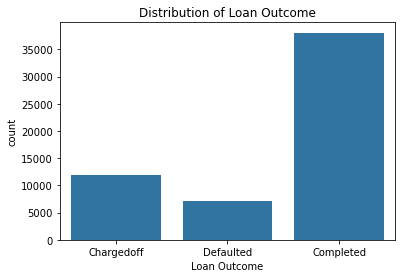

In [22]:
# Distribution of loan status (outcome)
sns.countplot(x='LoanStatus', data=prosper, color=base_color)
plt.xlabel('Loan Outcome')
plt.title('Distribution of Loan Outcome');

The outcome of the loans is generally good, with most of the loans completed.

Next up: the distribution of `LoanOriginalAmount`

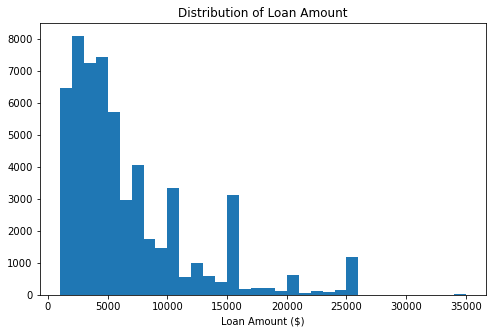

In [24]:
# plotting on a standard scale
bins = np.arange(1000, prosper['LoanOriginalAmount'].max()+1000, 1000)

plt.figure(figsize = (8,5))
plt.hist(x='LoanOriginalAmount', data=prosper, bins=bins)
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount');

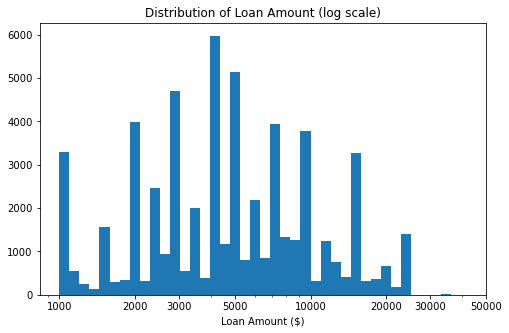

In [25]:
# there's a long tail in the distribution, let's put it on a log scale instead
bins = 10 ** np.arange(3, np.log10(prosper['LoanOriginalAmount'].max())+0.04, 0.04)

plt.figure(figsize = (8,5))
plt.hist(x='LoanOriginalAmount', data=prosper, bins=bins)
plt.xscale('log')
plt.xticks([1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000], [1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000])
plt.xlabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount (log scale)');

The LoanOriginalAmount distribution appears unimodal with the peak around \\$4,000. Also, the small bin size proves very illuminating. There are large spikes in frequency at the bars loan amounts to the nearest thousand (e.g. \\$1,000, \\$2,000, \\$3,000, etc.). This is probably because borrowers are requesting for precise loan amounts.

Next up: the distribution of `StatedMonthlyIncome`

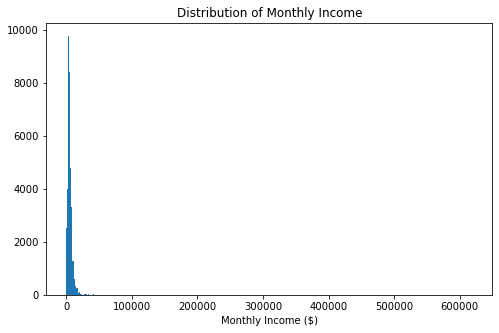

In [26]:
# plotting on a standard scale
bins = np.arange(0, prosper['StatedMonthlyIncome'].max()+1000, 1000)

plt.figure(figsize = (8,5))
plt.hist(x='StatedMonthlyIncome', data=prosper, bins=bins)
plt.xlabel('Monthly Income ($)')
plt.title('Distribution of Monthly Income');

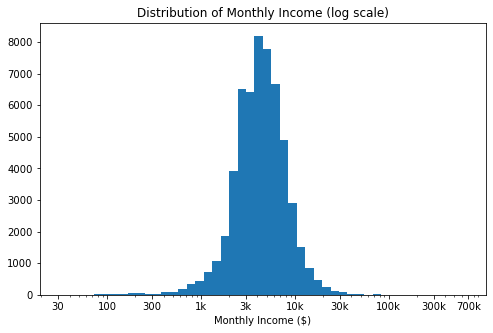

In [27]:
# there's a long tail in the distribution, let's put it on a log scale instead
bins = 10 ** np.arange(1.5, np.log10(prosper['StatedMonthlyIncome'].max())+0.09, 0.09)

plt.figure(figsize = (8,5))
plt.hist(x='StatedMonthlyIncome', data=prosper, bins=bins)
plt.xscale('log')
plt.xticks([30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5, 3e5, 7e5], [30, 100, 300, '1k', '3k', '10k', '30k', '100k', '300k', '700k'])
plt.xlabel('Monthly Income ($)')
plt.title('Distribution of Monthly Income (log scale)');

The StatedMonthlyIncome distribution appears unimodal with the peak around \\$4,000. Most of the distribution appears to be between \\$2,000 and \\$8,000 with a few on both the low and high price end. 

Next up: `BorrowerAPR`

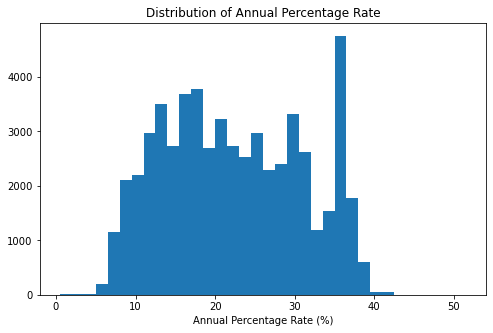

In [28]:
# plotting on a standard scale
bins = np.arange(0.5, prosper['BorrowerAPR'].max()+1.5, 1.5)

plt.figure(figsize = (8,5))
plt.hist(x='BorrowerAPR', data=prosper, bins=bins)
plt.xlabel('Annual Percentage Rate (%)')
plt.title('Distribution of Annual Percentage Rate');

The BorrowerAPR distribution appears unimodal with the peak between 35% and 40%. Most of the distribution appears to be between 10% and 30%.

Next up: `BorrowerRate`

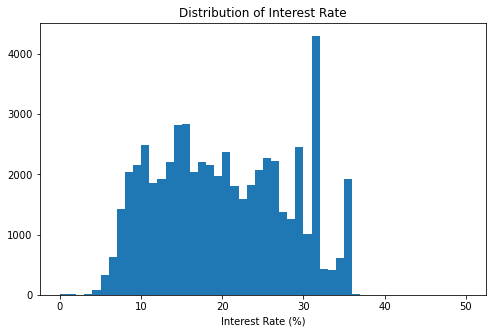

In [29]:
# plotting on a standard scale
bins = np.arange(0, prosper['BorrowerRate'].max()+1, 1)

plt.figure(figsize = (8,5))
plt.hist(x='BorrowerRate', data=prosper, bins=bins)
plt.xlabel('Interest Rate (%)')
plt.title('Distribution of Interest Rate');

The BorrowerRate distribution appears unimodal with the peak a little above 30%. Most of the distribution appears to be between 10% and 30%.

Next up: `Term`, `ProsperScore` and `LoanGrade`

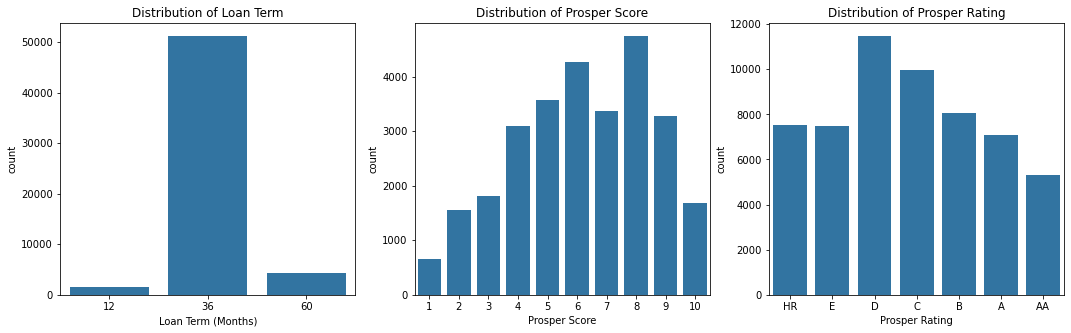

In [30]:
# let's plot all three together to get an idea of each ordinal variable's distribution.
plt.figure(figsize=(18,5))

# plot the distribution for Term
plt.subplot(1,3,1)
sns.countplot(x='Term', data=prosper, color=base_color)
plt.xlabel('Loan Term (Months)')
plt.title('Distribution of Loan Term')

# plot the distribution for Prosper Score
plt.subplot(1,3,2)
sns.countplot(x='ProsperScore', data=prosper, color=base_color)
plt.xlabel('Prosper Score')
plt.title('Distribution of Prosper Score')

# plot the distribution for Loan Grade (Propser Rating)
plt.subplot(1,3,3)
sns.countplot(x='LoanGrade', data=prosper, color=base_color)
plt.xlabel('Prosper Rating')
plt.title('Distribution of Prosper Rating');

- Majority of the loans have a 36 months term. 
- There is an upward trend in the distribution of Prosper Scores from  a score of 1 to 6 with the peak at 8. 
- Most of the loans have a Prosper Rating from AA - D with the peak at D.

Next up: `Occupation` and `ListingCategory`

In [41]:
# number of unique occupations
prosper['Occupation'].nunique()

67

There are 67 unique occupations and 20 unique Listing Category. Visualizing all categories would be a lot, thus let's visualize the top 10 for each of these features. 

In [42]:
# top 10 occupations and listing categories
top_jobs = prosper['Occupation'].value_counts().head(10).sort_values(ascending=True)
top_listing_cat = prosper['ListingCategory'].value_counts().head(10).sort_values(ascending=True)

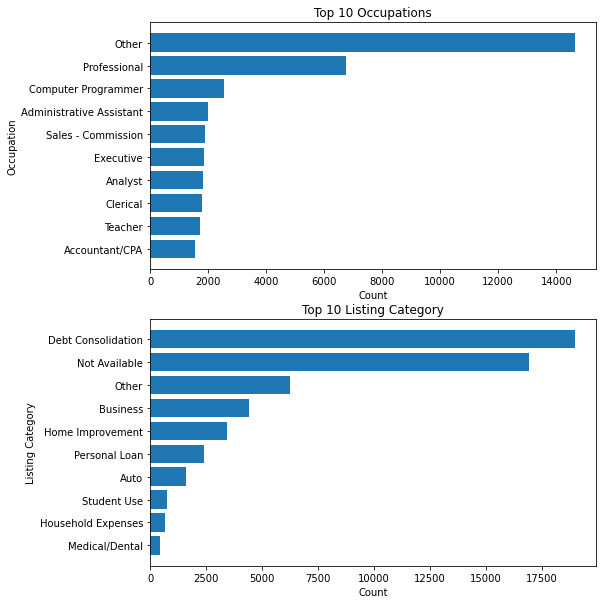

In [43]:
# let's plot the two together
plt.figure(figsize=(8,10))

# Subplot 1: Top 10 Occupations
plt.subplot(2,1,1)
plt.barh(top_jobs.index, top_jobs)
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Top 10 Occupations')

# Subplot 2: Top 10 Listing Category
plt.subplot(2,1,2)
plt.barh(top_listing_cat.index, top_listing_cat)
plt.xlabel('Count')
plt.ylabel('Listing Category')
plt.title('Top 10 Listing Category');

- Majority of the borrowers were unable to find their their occupation listed so they stated it as 'Other', The next highest occupation distribution is 'Professional'followed by 'Computer Programmer'.
- Most of the loans were used for Debt Consolidation and a significant number of borrowers did not state their reason for taking the loan.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The outcome of the loans was generally good, with most of the loans completed and few either defaulted or chargedoff.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no unusual distribution of the features investigated. 
The active and cancelled loans were dropped from the dataset so as to be able to analyse inactive loans. And to be able to accurately visualize the distribution of the prosper ratings for the loans, I had to merge two columns; `CreditGrade` and `ProsperRating (Alpha)` seeing they both give the same information but were seperated based on the date the loan listing was created. The `BorrowerAPR` and `BorrowerRate` were also converted to percentages for easy comprehension. 

<a id='bve'></a>
## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between numerical features in the data.

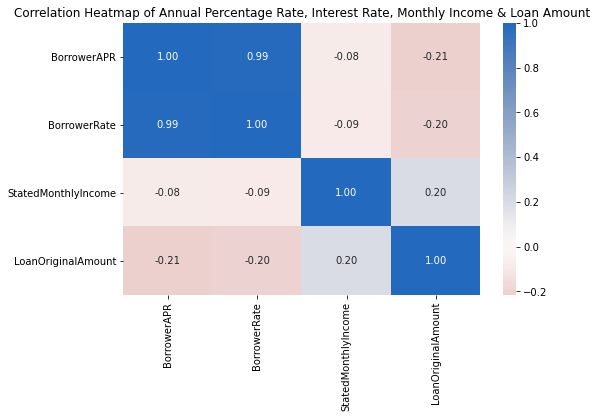

In [33]:
# correlation plot using a heatmap
plt.figure(figsize = [8, 5])
sns.heatmap(prosper.corr(), annot=True, cmap='vlag_r', center = 0, fmt='.2f')
plt.title('Correlation Heatmap of Annual Percentage Rate, Interest Rate, Monthly Income & Loan Amount');

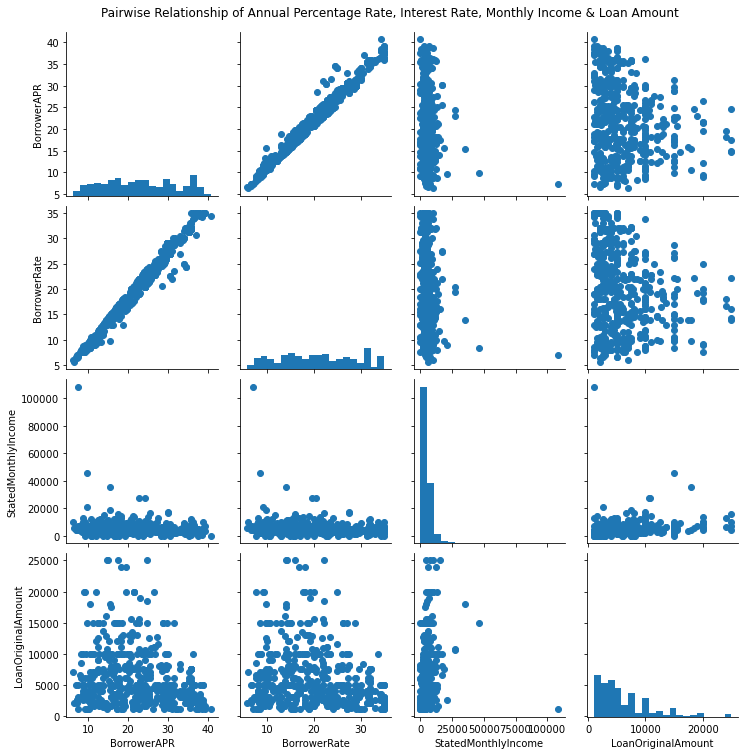

In [39]:
# plot matrix: sample 500 loan listings so that plots are clearer and they render faster
samples = np.random.choice(prosper.shape[0], 500, replace = False)
listings_samp = prosper.loc[samples,:]

g = sns.PairGrid(data = listings_samp, vars = ['BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'LoanOriginalAmount'])
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.suptitle('Pairwise Relationship of Annual Percentage Rate, Interest Rate, Monthly Income & Loan Amount', y=1.03);

`BorrowerAPR` and `BorrowerRate` are highly positively correlated with each other. `StatedMonthlyIncome` and `LoanOriginalAmount` interestingly don't have any strong correlations with any other numeric variable in the dataset although, they have a slight positive correlation with each other. Also, we see a slight negative correlation between `StatedMonthlyIncome` & `BorrowerAPR`, `LoanOriginalAmount` & `BorrowerRate`, `LoanOriginalAmount` & `BorrowerAPR`, and `StatedMonthlyIncome` & `BorrowerRate`.

Let's move on to look at the relationship between `LoanStatus` and other numerical features in the dataset:

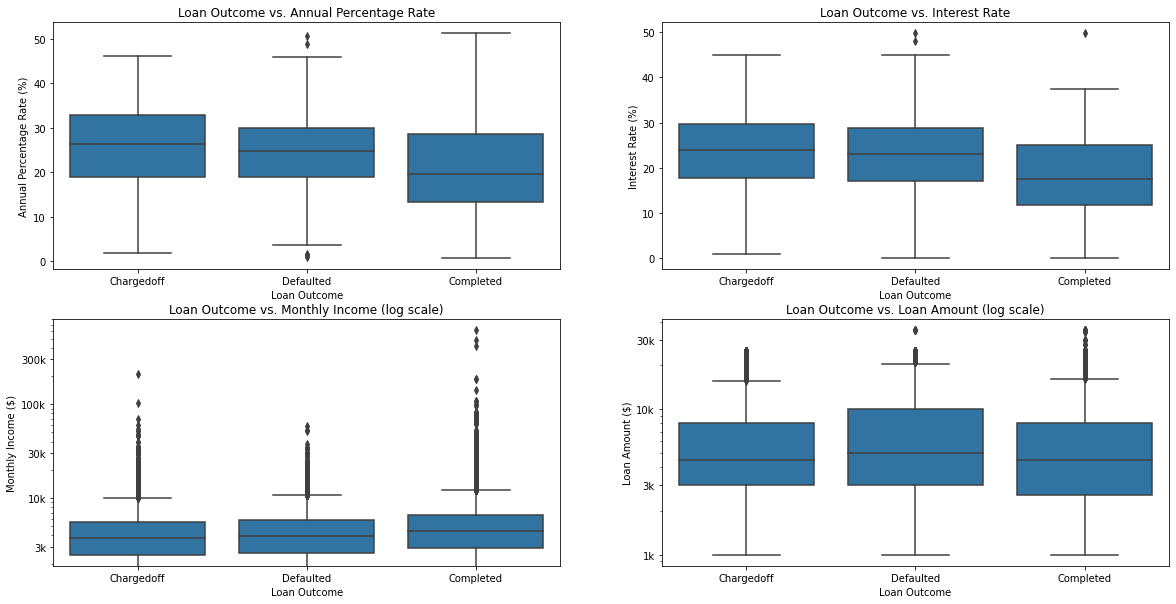

In [31]:
# LoanStatus and numerical features
plt.figure(figsize=(20,10))

# subplot 1: LoanStatus vs. BorrowerAPR
plt.subplot(2,2,1)
sns.boxplot(x='LoanStatus', y='BorrowerAPR', data=prosper, color=base_color)
plt.xlabel('Loan Outcome')
plt.ylabel('Annual Percentage Rate (%)')
plt.title('Loan Outcome vs. Annual Percentage Rate')

# subplot 2: LoanStatus vs. BorrowerRate
plt.subplot(2,2,2)
sns.boxplot(x='LoanStatus', y='BorrowerRate', data=prosper, color=base_color)
plt.xlabel('Loan Outcome')
plt.ylabel('Interest Rate (%)')
plt.title('Loan Outcome vs. Interest Rate')

# subplot 3: LoanStatus vs. StatedMonthlyIncome; log transformation of StatedMonthlyIncome
plt.subplot(2,2,3)
sns.boxplot(x='LoanStatus', y='StatedMonthlyIncome', data=prosper, color=base_color)
plt.xlabel('Loan Outcome')
plt.yscale('log')
plt.yticks([3e3, 1e4, 3e4, 1e5, 3e5], ['3k', '10k', '30k', '100k', '300k'])
plt.ylabel('Monthly Income ($)')
plt.title('Loan Outcome vs. Monthly Income (log scale)')

# subplot 4: LoanStatus vs. LoanOriginalAmount; log transformation of LoanOriginalAmount
plt.subplot(2,2,4)
sns.boxplot(x='LoanStatus', y='LoanOriginalAmount', data=prosper, color=base_color)
plt.xlabel('Loan Outcome')
plt.yscale('log')
plt.yticks([1e3, 3e3, 1e4, 3e4], ['1k', '3k', '10k', '30k'])
plt.ylabel('Loan Amount ($)')
plt.title('Loan Outcome vs. Loan Amount (log scale)');

As expected, `BorrowerAPR` and `BorrowerRate` have a similar relationship with `LoanStatus`, they both have a negative relationship with `LoanStatus` while `StatedMonthlyIncome` has a positive relationship with `LoanStatus`. Also, defaulted loans appear to be loans with an higher `LoanOriginalAmount` than chargedoff and completed loans.

Next, let's look at the relationship between `LoanStatus` and other categorical features.

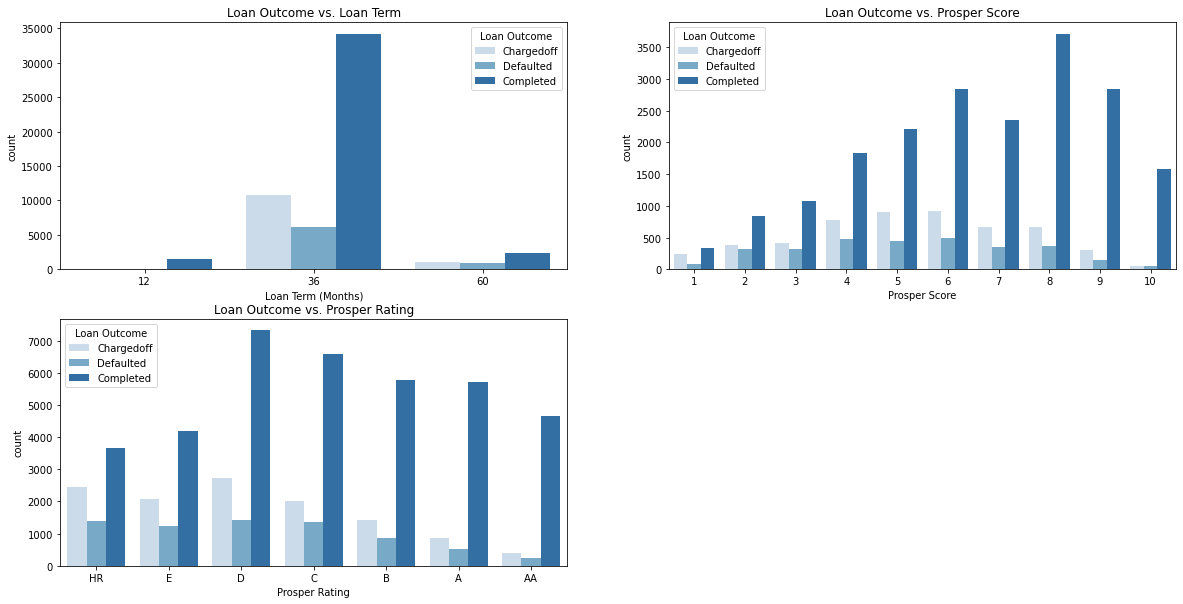

In [40]:
# LoanStatus and ordered categorical variables
plt.figure(figsize=(20,10))

# Subplot 1: Term vs. LoanStatus
plt.subplot(2,2,1)
sns.countplot(x='Term', data=prosper, hue='LoanStatus', palette='Blues')
plt.xlabel('Loan Term (Months)')
plt.legend(title='Loan Outcome')
plt.title('Loan Outcome vs. Loan Term')

# Subplot 2: ProsperScore vs. LoanStatus
plt.subplot(2,2,2)
sns.countplot(x='ProsperScore', data=prosper, hue='LoanStatus', palette='Blues')
plt.xlabel('Prosper Score')
plt.legend(title='Loan Outcome')
plt.title('Loan Outcome vs. Prosper Score')

# Subplot 3: LoanGrade vs. LoanStatus
plt.subplot(2,2,3)
sns.countplot(x='LoanGrade', data=prosper, hue='LoanStatus', palette='Blues')
plt.xlabel('Prosper Rating')
plt.legend(title='Loan Outcome')
plt.title('Loan Outcome vs. Prosper Rating');

There doesn't seem to be any interaction between loan term and outcome. There are slight interactions between loan outcome and prosper score, also between loan outcome and prosper rating. There appear to be more completed loans and less chargedoff loans proportionally on the higher prosper scores (6 - 10) as well as higher prosper ratings (B - AA). 

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how `ProsperScore` is related to the numerical features.

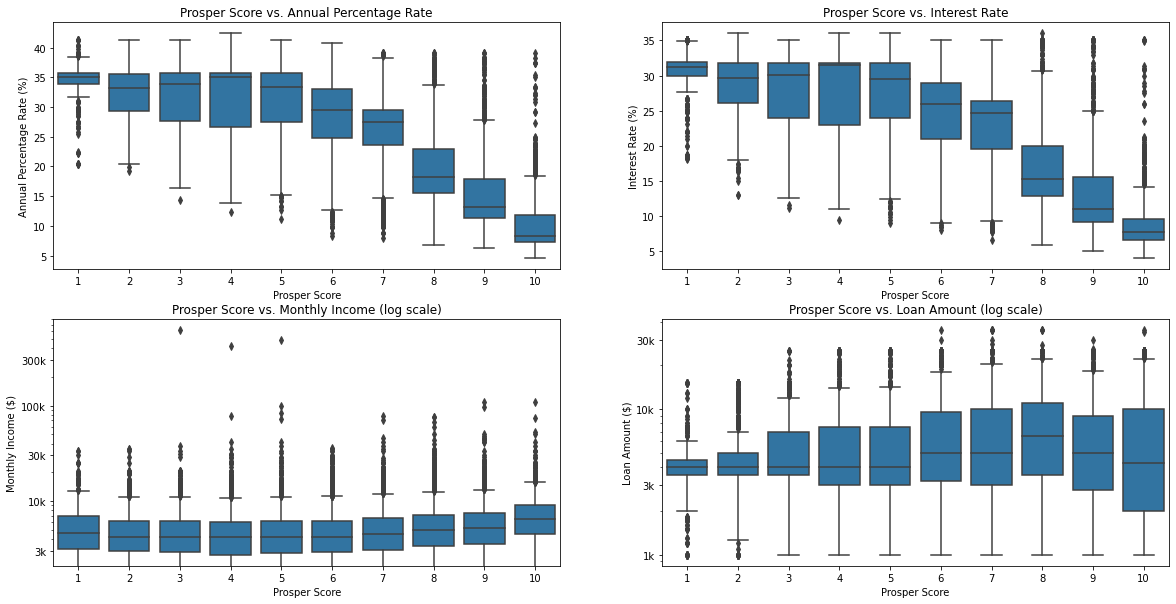

In [41]:
# ProsperScore and numerical features
plt.figure(figsize=(20,10))

# subplot 1: ProsperScore vs. BorrowerAPR
plt.subplot(2,2,1)
sns.boxplot(x='ProsperScore', y='BorrowerAPR', data=prosper, color=base_color)
plt.xlabel('Prosper Score')
plt.ylabel('Annual Percentage Rate (%)')
plt.title('Prosper Score vs. Annual Percentage Rate')

# subplot 2: ProsperScore vs. BorrowerRate
plt.subplot(2,2,2)
sns.boxplot(x='ProsperScore', y='BorrowerRate', data=prosper, color=base_color)
plt.xlabel('Prosper Score')
plt.ylabel('Interest Rate (%)')
plt.title('Prosper Score vs. Interest Rate')

# subplot 3: ProsperScore vs. StatedMonthlyIncome; log transformation of StatedMonthlyIncome
plt.subplot(2,2,3)
sns.boxplot(x='ProsperScore', y='StatedMonthlyIncome', data=prosper, color=base_color)
plt.xlabel('Prosper Score')
plt.yscale('log')
plt.yticks([3e3, 1e4, 3e4, 1e5, 3e5], ['3k', '10k', '30k', '100k', '300k'])
plt.ylabel('Monthly Income ($)')
plt.title('Prosper Score vs. Monthly Income (log scale)')

# subplot 4: ProsperScore vs. LoanOriginalAmount; log transformation of LoanOriginalAmount
plt.subplot(2,2,4)
sns.boxplot(x='ProsperScore', y='LoanOriginalAmount', data=prosper, color=base_color)
plt.xlabel('Prosper Score')
plt.yscale('log')
plt.yticks([1e3, 3e3, 1e4, 3e4], ['1k', '3k', '10k', '30k'])
plt.ylabel('Loan Amount ($)')
plt.title('Prosper Score vs. Loan Amount (log scale)');

As expected, there is a similar negative relationship between `ProsperScore` and both `BorrowerAPR` and `BorrowerRate`. There is also a slight positive relationship between `ProsperScore` and `StatedMonthlyIncome`. There seems to be a slight positive relationship between `ProsperScore` and `LoanOriginalAmount`. 

Next, let's look at how Prosper Rating (`LoanGrade`) is related with the numerical features.

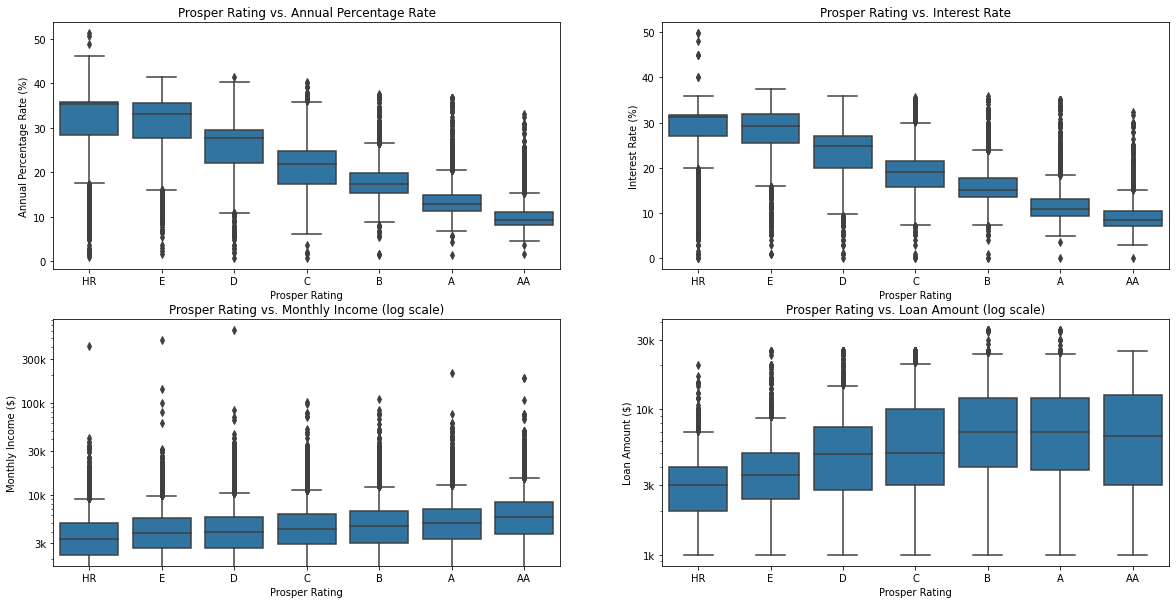

In [42]:
# LoanGrade and numerical features
plt.figure(figsize=(20,10))

# subplot 1: LoanGrade vs. BorrowerAPR
plt.subplot(2,2,1)
sns.boxplot(x='LoanGrade', y='BorrowerAPR', data=prosper, color=base_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Annual Percentage Rate (%)')
plt.title('Prosper Rating vs. Annual Percentage Rate')

# subplot 2: LoanGrade vs. BorrowerRate
plt.subplot(2,2,2)
sns.boxplot(x='LoanGrade', y='BorrowerRate', data=prosper, color=base_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Interest Rate (%)')
plt.title('Prosper Rating vs. Interest Rate')

# subplot 3: LoanGrade vs. StatedMonthlyIncome; log transformation of StatedMonthlyIncome
plt.subplot(2,2,3)
sns.boxplot(x='LoanGrade', y='StatedMonthlyIncome', data=prosper, color=base_color)
plt.xlabel('Prosper Rating')
plt.yscale('log')
plt.yticks([3e3, 1e4, 3e4, 1e5, 3e5], ['3k', '10k', '30k', '100k', '300k'])
plt.ylabel('Monthly Income ($)')
plt.title('Prosper Rating vs. Monthly Income (log scale)')

# subplot 4: LoanGrade vs. LoanOriginalAmount; log transformation of LoanOriginalAmount
plt.subplot(2,2,4)
sns.boxplot(x='LoanGrade', y='LoanOriginalAmount', data=prosper, color=base_color)
plt.xlabel('Prosper Rating')
plt.yscale('log')
plt.yticks([1e3, 3e3, 1e4, 3e4], ['1k', '3k', '10k', '30k'])
plt.ylabel('Loan Amount ($)')
plt.title('Prosper Rating vs. Loan Amount (log scale)');

Interestingly, all numeric features have a similar pattern of relationship with Prosper Rating (`LoanGrade`) as with `ProsperScore`. 

Let's look into the relationship between `ProsperScore` and `LoanGrade` (Prosper Rating).

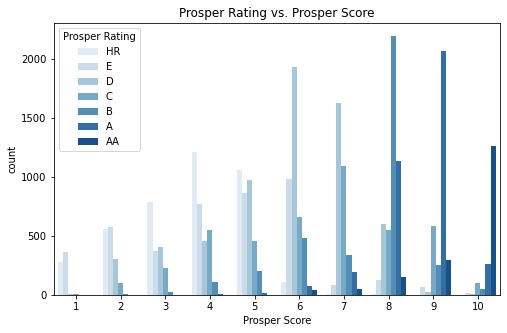

In [43]:
# ProsperScore vs. LoanGrade
plt.figure(figsize = (8,5))

sns.countplot(x='ProsperScore', data=prosper, hue='LoanGrade', palette='Blues')
plt.xlabel('Prosper Score')
plt.legend(title='Prosper Rating', loc = 'upper left')
plt.title('Prosper Rating vs. Prosper Score');

As expected, the shade of the bars get darker as the Prosper Score increases signifying a positive relationship between Prosper Score and Prosper Rating. 

Next, let's look into the relationship between `Term` and `ProsperScore`, and  `Term` and `LoanGrade` (Prosper Rating)

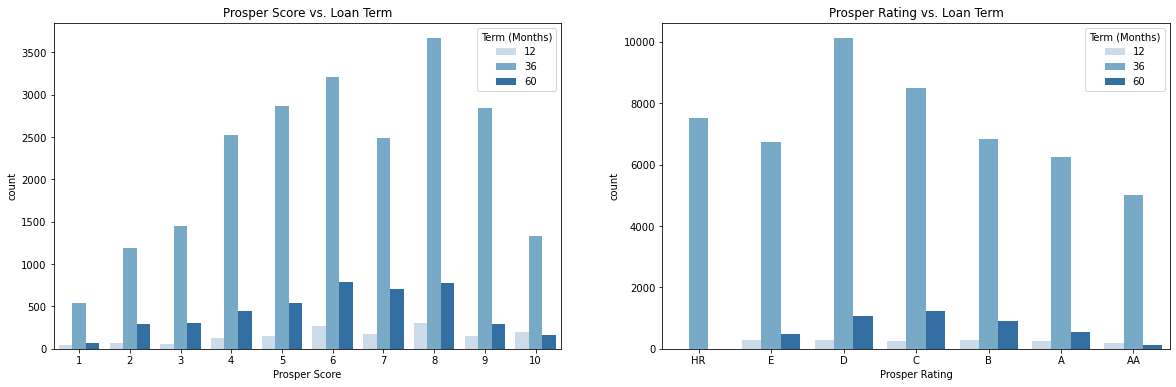

In [44]:
plt.figure(figsize = (20,6))

# Subplot 1: ProsperScore vs. Term
plt.subplot(1,2,1)
sns.countplot(x='ProsperScore', data=prosper, hue='Term', palette='Blues')
plt.xlabel('Prosper Score')
plt.legend(title='Term (Months)')
plt.title('Prosper Score vs. Loan Term')

# Subplot 2: LoanGrade vs. Term
plt.subplot(1,2,2)
sns.countplot(x='LoanGrade', data=prosper, hue='Term', palette='Blues')
plt.xlabel('Prosper Rating')
plt.legend(title='Term (Months)')
plt.title('Prosper Rating vs. Loan Term');

There doesn't seem to be that much interaction between `ProsperScore` and `Term`, same also goes for Prosper Rating (`LoanGrade`) and `Term`, though proportionally it seems like there might be more 36 month tenured loans in the top half of the prosper score (6-10).

Next, let's look into the average `LoanOriginalAmount` for each month.

In [46]:
# create a column that contains the month the listing was created
prosper['Month'] = prosper['ListingCreationDate'].dt.month

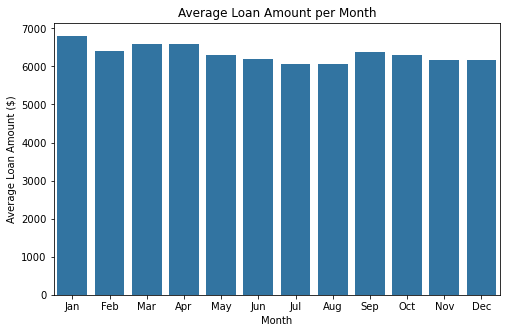

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Month', y='LoanOriginalAmount', data=prosper, color=base_color, ci=None)
plt.xticks(np.arange(0,12,1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Loan Amount ($)')
plt.title('Average Loan Amount per Month');

January has the highest average `LoanOriginalAmount`. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Loan outcome (`LoanStatus`) has a negative relationship with both `BorrowerAPR` and `BorrowerRate`.
- Loan outcome (`LoanStatus`) has a positive relationship with `StatedMonthlyIncome`.
- Defaulted loans appear to be loans with an higher `LoanOriginalAmount` than that of chargedoff and completed loans.
- There appear to be more completed loans and less chargedoff loans proportionally on the higher prosper scores (6 - 10) as well as higher prosper ratings (B - AA). 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- `BorrowerAPR` and `BorrowerRate` are highly postively correlated with each other. 
- `StatedMonthlyIncome` and `LoanOriginalAmount` have a slight positive correlation with each other. 
- There's a slight negative correlation between `StatedMonthlyIncome` & `BorrowerAPR`, `LoanOriginalAmount` & `BorrowerRate`, `LoanOriginalAmount` & `BorrowerAPR`, and `StatedMonthlyIncome` & `BorrowerRate`.
- `ProsperScore` and Prosper Rating (`LoanGrade`) have a positive correlation with each other and they both similar pattern of relationship with the numeric variables; a negative relationship with both `BorrowerAPR` & `BorrowerRate` and a slight positive relationship with both `StatedMonthlyIncome` and `LoanOriginalAmount`. 
- `Term` shows no strong correlation with `LoanStatus`, so it won't be explored further. 

<a id='mve'></a>
## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how `BorrowerRate` and `LoanOriginalAmount` both play into Loan Outcome (`LoanStatus`).

In [50]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 49+7, 7)
    bins_y = np.arange(1000, 35000+900, 900)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 10)
    plt.colorbar(label='Count')

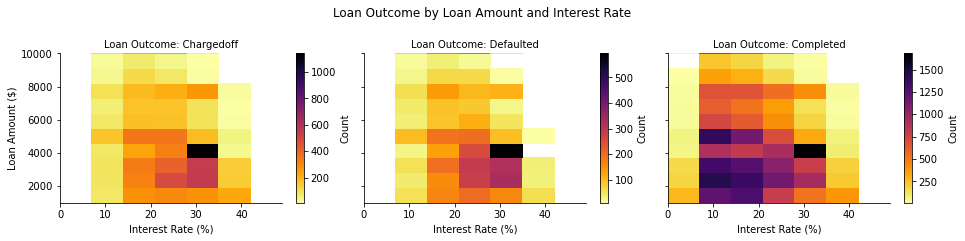

In [51]:
# create a faceted heat map on levels of the LoanStatus variable
g = sns.FacetGrid(data = prosper, col = 'LoanStatus', height = 3, aspect=1.5)
g.map(hist2dgrid, 'BorrowerRate', 'LoanOriginalAmount', color = 'inferno_r')
g.set(ylim=[1000, 10000])
g.set_titles(col_template='Loan Outcome: {col_name}')
g.set_xlabels('Interest Rate (%)')
g.set_ylabels('Loan Amount ($)')
g.fig.suptitle("Loan Outcome by Loan Amount and Interest Rate", y=1.1);

In the faceted heat map, you can see the relationship of loan outcome (`LoanStatus`) against loan amount (`LoanOriginalAmount`) and interest rate (`BorrowerRate`), to varying levels of effectiveness. As the loan outcome moves from 'Chargedoff' to 'Completed', the 'cloud' of points moves towards the lower left of the plot, thus showing decreased loan amount and decreased interest rate.

Next, let's bring `ProsperScore` into the mix.

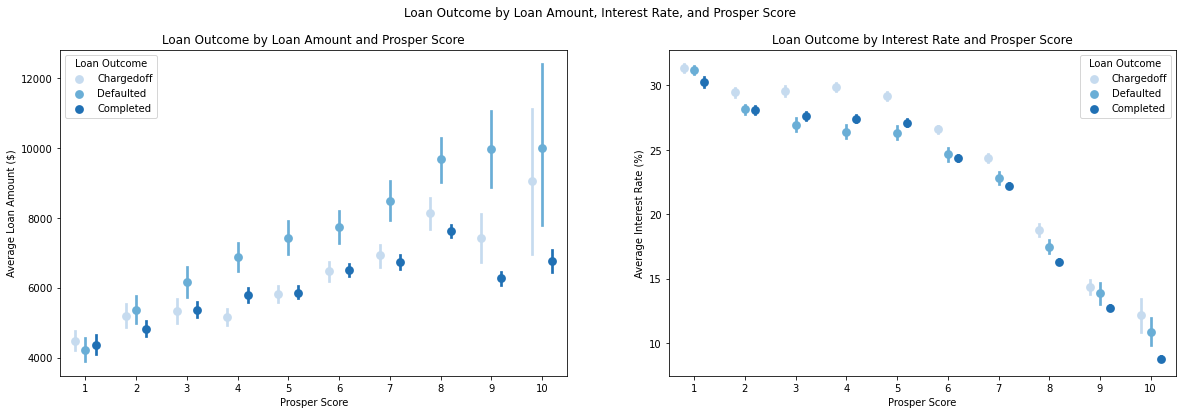

In [53]:
plt.figure(figsize=(20,6))
plt.suptitle('Loan Outcome by Loan Amount, Interest Rate, and Prosper Score')

# Subplot 1: the relationship of LoanStatus against ProsperScore and LoanOriginalAmount
plt.subplot(1,2,1)
sns.pointplot(x='ProsperScore', y='LoanOriginalAmount', data=prosper, hue='LoanStatus',
              palette='Blues', linestyles='', dodge=0.4)
plt.xlabel('Prosper Score')
plt.ylabel('Average Loan Amount ($)')
plt.title('Loan Outcome by Loan Amount and Prosper Score')
plt.legend(title='Loan Outcome')

# Subplot 2: the relationship of LoanStatus against ProsperScore and BorrowerRate
plt.subplot(1,2,2)
sns.pointplot(x='ProsperScore', y='BorrowerRate', data=prosper, hue='LoanStatus',
              palette='Blues', linestyles='', dodge=0.4)
plt.xlabel('Prosper Score')
plt.ylabel('Average Interest Rate (%)')
plt.title('Loan Outcome by Interest Rate and Prosper Score')
plt.legend(title='Loan Outcome');

Comparing both subplots, listings with a high prosper score, low interest rate and not so high loan amount (<=\\$7,000) seems to be completed than other listings, while listings with very low prosper scores, high interest rate and low loan amount seems to be chargedoff more than other listings.   

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I investigated how `BorrowerRate` and `LoanAmount` both play into Loan outcome (`LoanStatus`). The multivariate exploration showed a slight negative effect of decreased `LoanAmount` and decreased `BorrowerRate` on better loan outcome. I extended my investigation by introducing `ProsperScore` into the mix and the exploration showed that listings with a high prosper score, low interest rate and not so high loan amount (<=\\$7,000) seems to be completed more than other listings, while listings with very low prosper scores, high interest rate and low loan amount seems to be chargedoff more than other listings. 


### Were there any interesting or surprising interactions between features?

It is interesting to find out that listings with lower risks based on historical Prosper data (i.e. `ProsperScore`) had much more lower `BorrowerRate` than high risk loans. 

<a id='conclusions'></a>
## Conclusions

In the exploration, I found that the distribution of the loan outcome was generally good, with a large proportion of the loans completed. When looking at the effect of the loan amount and interest rate on the loan outcome, I found that a decrease in the loan amount and a decrease in the interest rate tend to result in a much better loan outcome. When I extended the multivariate exploration by introducing Prosper Score; _(a custom risk score based on historical Prosper data)_ into the mix, I found that listings with a high prosper score, low interest rate and not so high loan amount (<=$7,000) seems to be completed more than other listings, while listings with very low prosper scores, high interest rate and low loan amount seems to be chargedoff more than other listings.

It was interesting to find out that listings high Prosper Score had much more lower interest rate than listings with low Prosper Score. 